In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train= pd.read_csv("/content/train_v9rqX0R.csv")
df_test = pd.read_csv("/content/test_AbJTz2l.csv")

In [3]:
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [4]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [5]:
#Checking the no of rows and columns
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df_train.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
df_train.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [10]:
#Splitting Target Variable
target = df_train['Item_Outlet_Sales']
target.head(3)

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

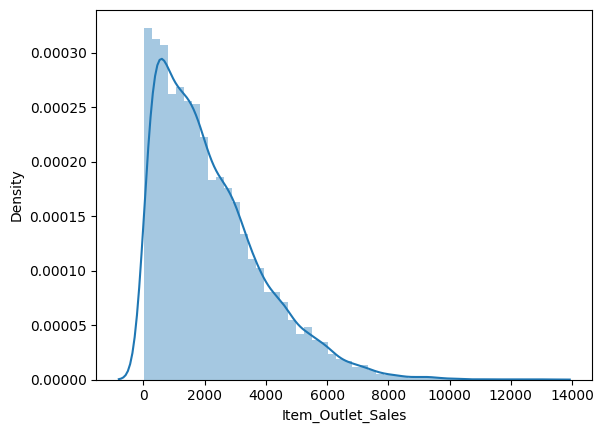

In [11]:
sns.distplot(target,hist=True) #Right skewed

<Axes: ylabel='Density'>

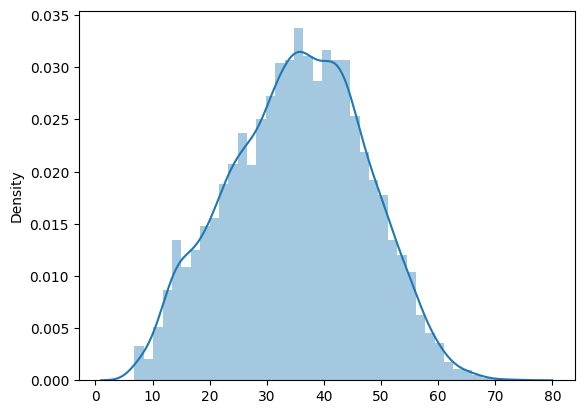

In [12]:
# Box-Cox Transformation to convert it into normal distribution
from scipy import stats
target_boxcox, lmbda = stats.boxcox(target)
transformed_target = target_boxcox
sns.distplot(transformed_target,hist=True)

array([[<Axes: title={'center': 'Item_Outlet_Sales'}>,
        <Axes: title={'center': 'Transformed Sales '}>]], dtype=object)

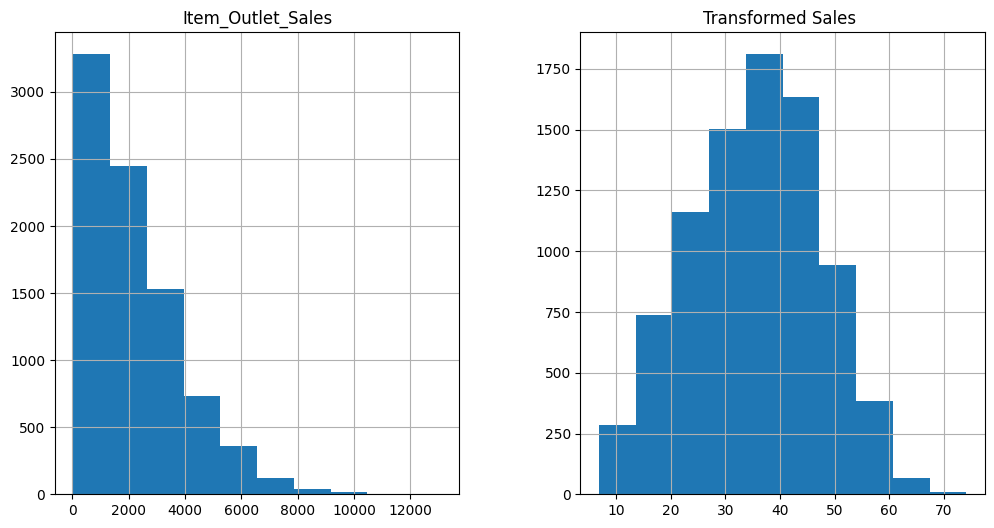

In [13]:
import matplotlib #The Target variable is normally distributed after Box Cox Transformation

matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
prices = pd.DataFrame({"Item_Outlet_Sales":df_train["Item_Outlet_Sales"],"Transformed Sales ":transformed_target})
prices.hist()

In [14]:
#For Training Data
train_miss = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([train_miss, percent], axis=1, keys=['Train_miss', 'Percent'])
missing_data.head(3)

,Train_miss,Percent
Outlet_Size,2410,0.282764
Item_Weight,1463,0.171653
Item_Fat_Content,0,0.000000


In [15]:
#For Training Data
test_miss = df_test.isnull().sum().sort_values(ascending=False)
percent = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([test_miss, percent], axis=1, keys=['Test_miss', 'Percent'])
missing_data.head(3)

,Test_miss,Percent
Outlet_Size,1606,0.282697
Item_Weight,976,0.171801
Item_Identifier,0,0.000000


In [16]:
#Filling Missing values for both numerical and categorical columns
#Fill missing values for  'Outlet_Size' with the mode(categorical) and 'Item_Weight'(numerical) with the mean(no outliers)
df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0], inplace=True)
df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0], inplace=True)
df_train['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)
df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean(), inplace=True)

In [17]:
# saving  all categorical columns in list
categorical_columns = [col for col in df_train.columns.values if df_train[col].dtype == 'object']
# dataframe with categorical features
data_cat = df_train[categorical_columns]
# dataframe with numerical features
data_num = df_train.drop(categorical_columns, axis=1)

In [18]:
# Using describe function in numeric dataframe
data_num.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.829835,0.066132,140.992782,1997.831867,2181.288914
std,4.226565,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.695633,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [19]:
# Printing 5 head observation in categorical dataframe
data_cat.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


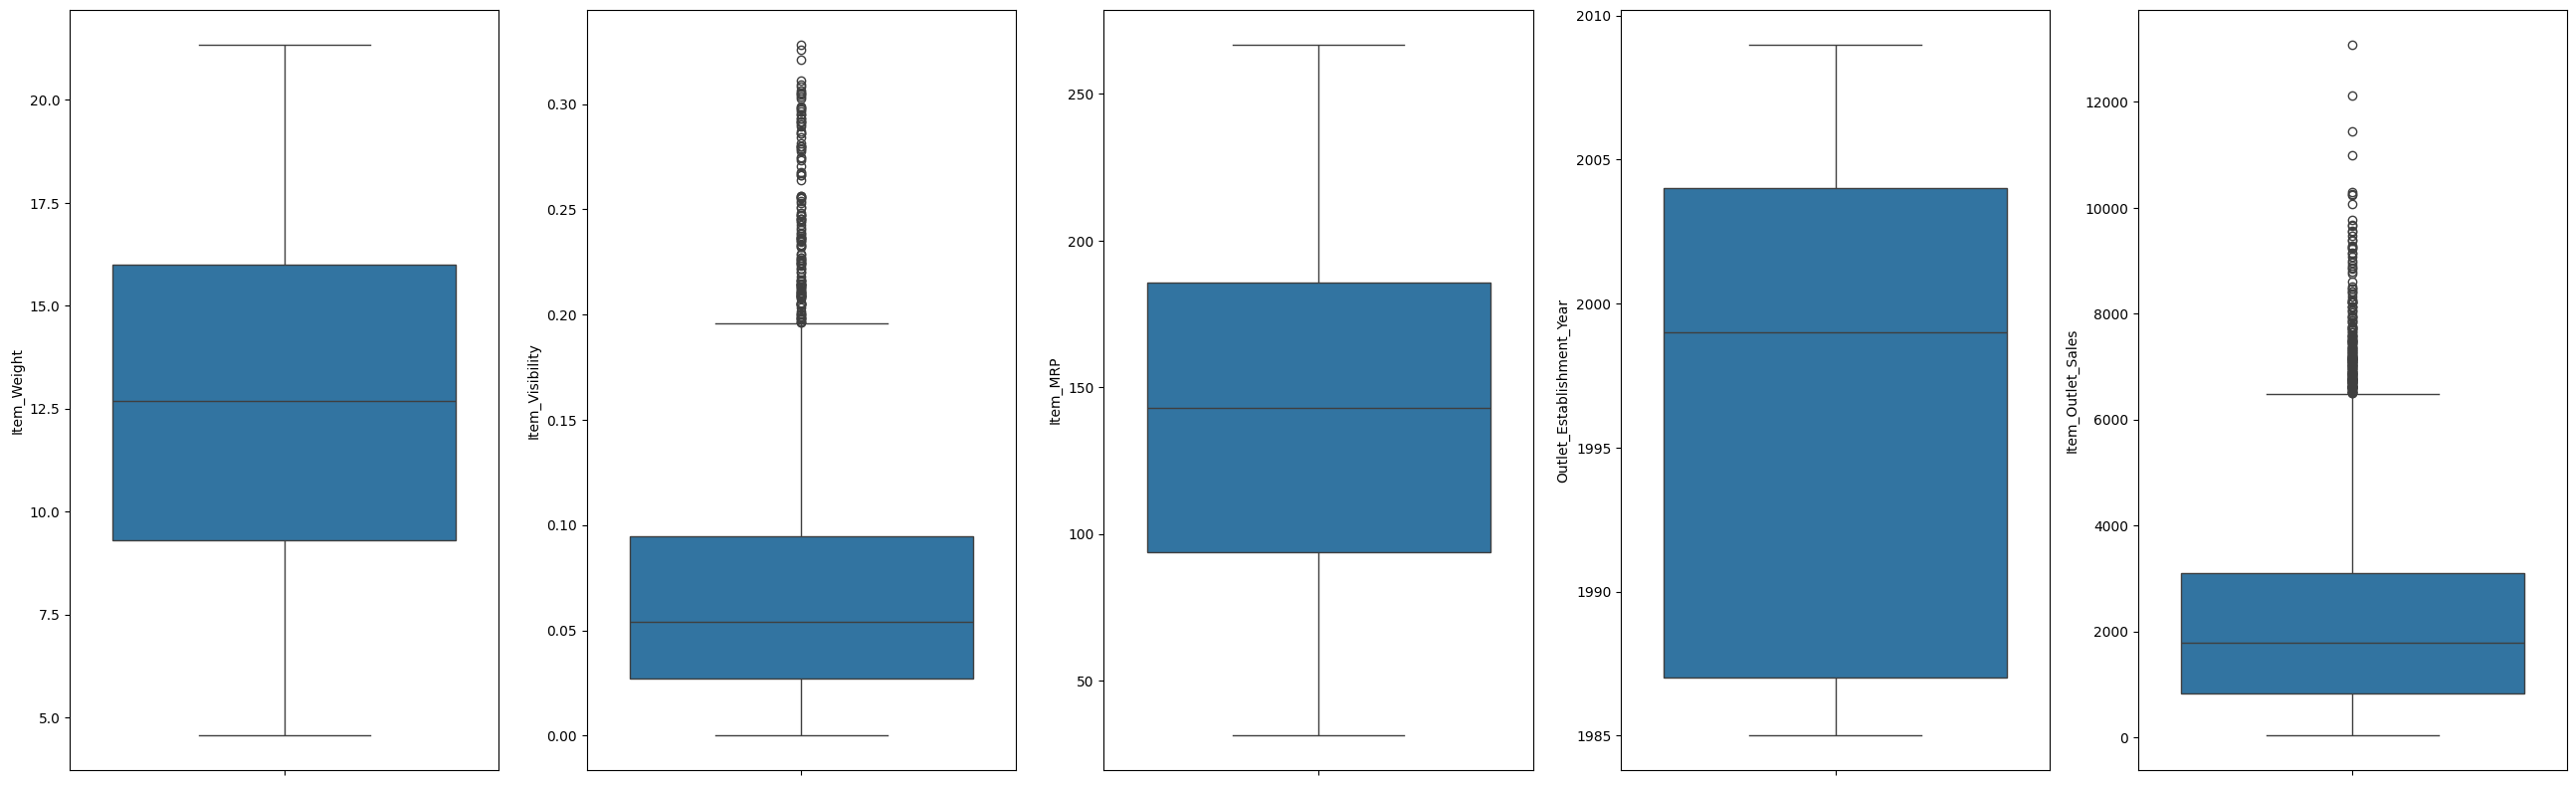

In [20]:
#Checking Outliers for the data
# Create subplots
fig, ax = plt.subplots(1, 5, figsize=(26, 8))

# Plot boxplots
for col, a in zip(data_num, ax):
  sns.boxplot(data=df_train, y=col, ax=a)

plt.tight_layout()
plt.show()

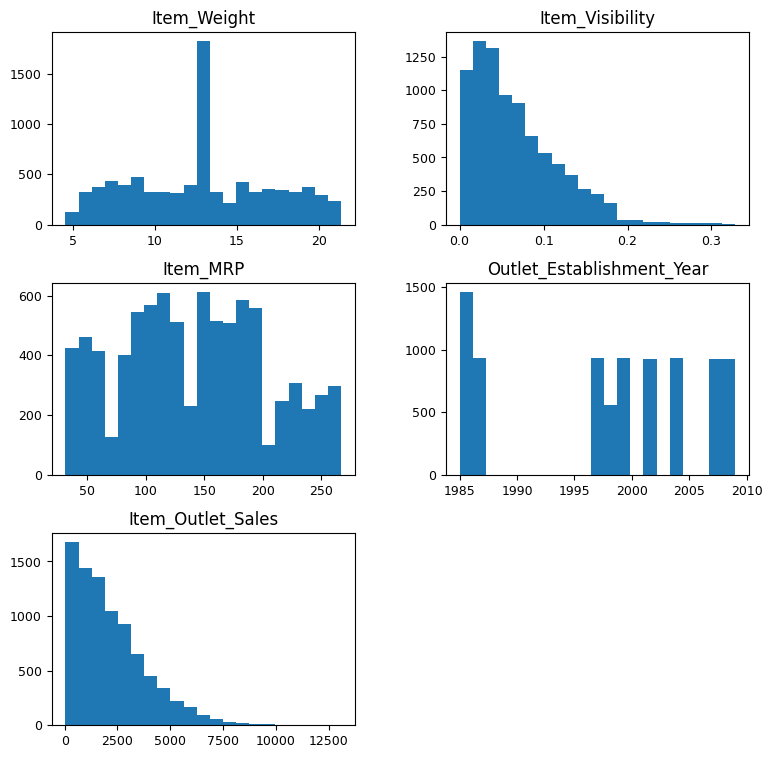

In [21]:
data_num.hist(figsize=(9,9),bins=21,xlabelsize=9,ylabelsize=9,grid=False);


In [22]:
#Dropping Item_Identifier column as it was an Id for item.
data_cat = data_cat.drop('Item_Identifier', axis=1)

In [23]:
data_cat.head()

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [24]:
#Checking missing values after imputation
df_test.isnull().sum().head(2)

,0
Item_Identifier,0
Item_Weight,0


Upper limit: 0.195979015
Lower limit: -0.07440424500000001


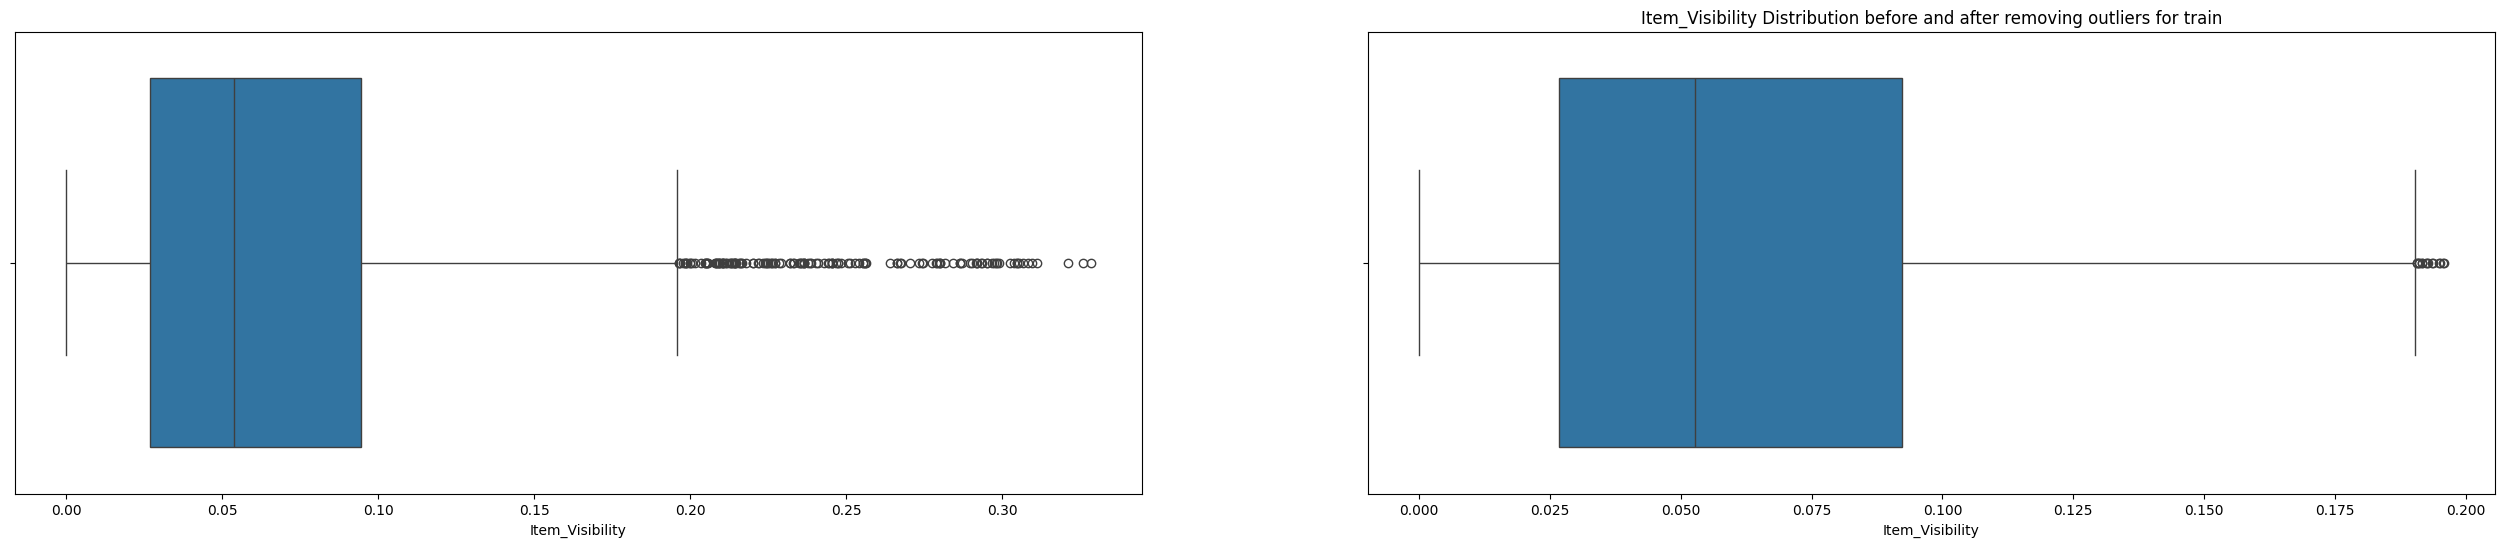

In [25]:
#Feature Engineering
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers(df, feature):
    # Calculate the 1st and 3rd quartiles (Q1 and Q3)
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Calculate upper and lower limits for outliers
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR

    return upper_limit, lower_limit

# Detect outliers in 'Item_Visibility'
upper, lower = detect_outliers(df_train, "Item_Visibility")
print(f"Upper limit: {upper}\nLower limit: {lower}")

# Create subplots to compare the boxplot before and after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(32, 6))

# Boxplot before removing outliers
sns.boxplot(x=df_train['Item_Visibility'], ax=ax[0])

# Remove outliers from the train dataset
total_set = df_train[(df_train['Item_Visibility'] > lower) & (df_train['Item_Visibility'] < upper)]

# Boxplot after removing outliers
sns.boxplot(x=total_set['Item_Visibility'], ax=ax[1])

# Title and show the plot
plt.title('Item_Visibility Distribution before and after removing outliers for train')
plt.show()

Upper limit: 0.195979015
Lower limit: -0.07440424500000001


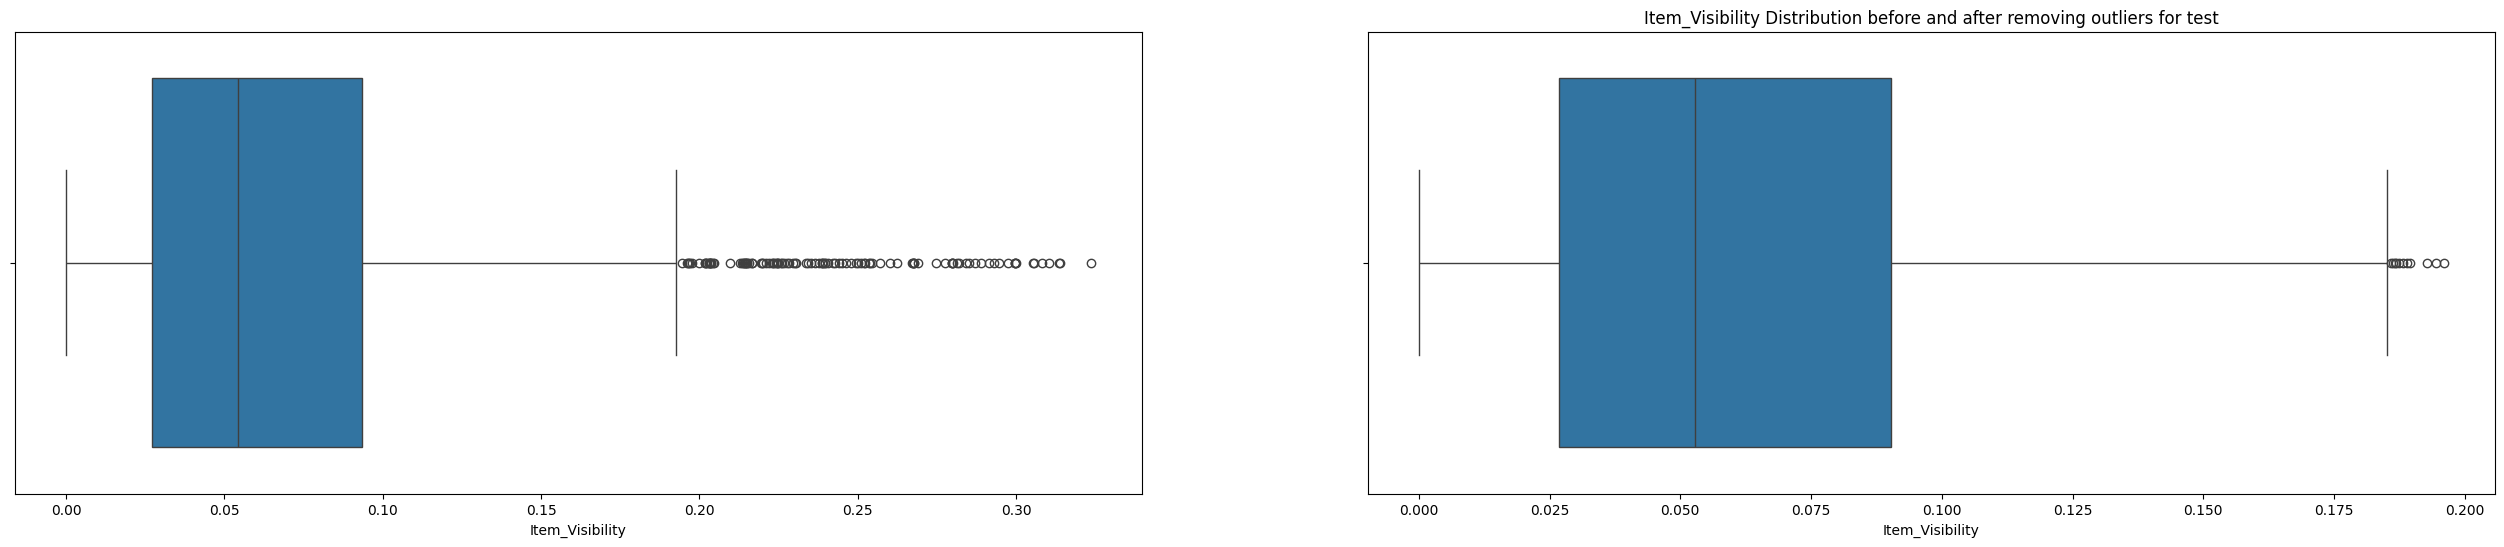

In [26]:
upper, lower = detect_outliers(df_train, "Item_Visibility")
print(f"Upper limit: {upper}\nLower limit: {lower}")

# Create subplots to compare the boxplot before and after removing outliers
fig, ax = plt.subplots(1, 2, figsize=(32, 6))

# Boxplot before removing outliers
sns.boxplot(x=df_test['Item_Visibility'], ax=ax[0])

# Remove outliers from the total dataset
total_set = df_test[(df_train['Item_Visibility'] > lower) & (df_test['Item_Visibility'] < upper)]

# Boxplot after removing outliers
sns.boxplot(x=total_set['Item_Visibility'], ax=ax[1])

# Title and show the plot
plt.title('Item_Visibility Distribution before and after removing outliers for test')
plt.show()

Upper limit: 6501.8699
Lower limit: -2566.3261


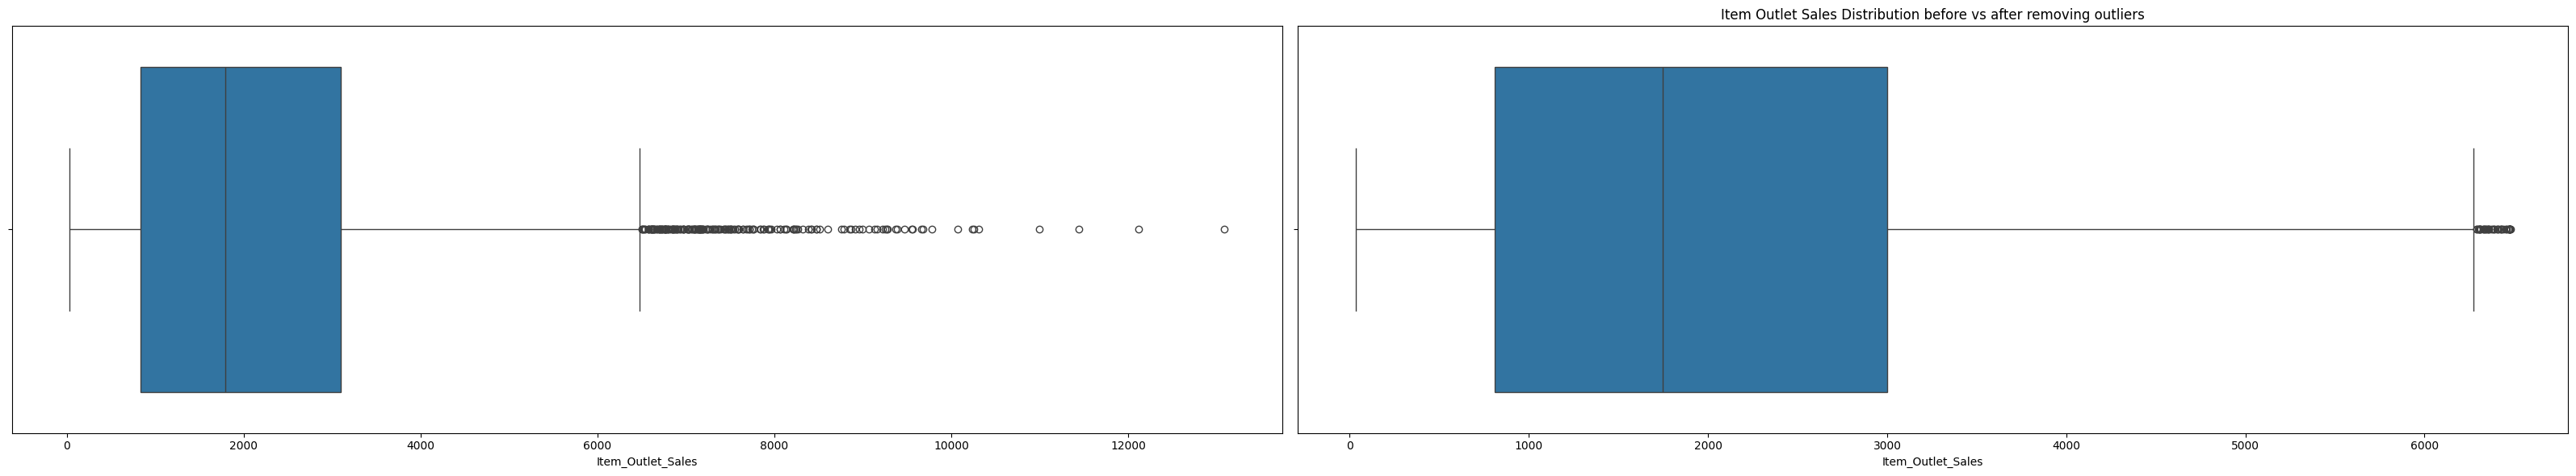

In [27]:
# Detect outliers for 'Item_Outlet_Sales'
upper, lower = detect_outliers(df_train, "Item_Outlet_Sales")
print(f"Upper limit: {upper}\nLower limit: {lower}")

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(32, 6))

# Boxplot before removing outliers
sns.boxplot(x=df_train['Item_Outlet_Sales'], ax=ax[0])

# Remove outliers and plot after removing them
total_set = df_train[(df_train['Item_Outlet_Sales'] > lower) & (df_train['Item_Outlet_Sales'] < upper)]
sns.boxplot(x=total_set['Item_Outlet_Sales'], ax=ax[1])

# Title and display the plot
plt.title('Item Outlet Sales Distribution before vs after removing outliers')
plt.tight_layout()
plt.show()

In [28]:
#Replacing the values in "Item_Fat_Content" column
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].replace({
    'Low Fat': 'Low Fat',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
})
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].replace({
    'Low Fat': 'Low Fat',
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'Regular': 'Regular',
    'reg': 'Regular'
})

In [29]:
# getting the established years in new column and delete old column
import datetime as dt
current_year = dt.datetime.today().year
df_train['Outlet_Estd'] = current_year - df_train['Outlet_Establishment_Year']
# Drop the 'Outlet_Establishment_Year' column
df_train.drop('Outlet_Establishment_Year', axis=1, inplace=True)
df_test['Outlet_Estd'] = current_year - df_test['Outlet_Establishment_Year']
df_test.drop('Outlet_Establishment_Year', axis=1, inplace=True)

In [30]:
df_train.shape,df_test.shape

((8523, 12), (5681, 11))

In [31]:
df_train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Estd'],
      dtype='object')

In [32]:
df_train["Item_Weight"].isnull().sum()

np.int64(0)

In [33]:
df_train['Item_Weight_Category'] = pd.cut(df_train['Item_Weight'],
                                          bins=[0, 5, 10, 15, 20, 25, float('inf')],
                                          labels=['Very Light', 'Light', 'Medium', 'Heavy', 'Very Heavy', 'Extremely Heavy'],
                                          right=False)

df_test['Item_Weight_Category'] = pd.cut(df_test['Item_Weight'],
                                         bins=[0, 5, 10, 15, 20, 25, float('inf')],
                                         labels=['Very Light', 'Light', 'Medium', 'Heavy', 'Very Heavy', 'Extremely Heavy'],
                                         right=False)

In [34]:
# Replace 'Extremely Heavy' with 'Heavy'
df_test['Item_Weight_Category'] = df_test['Item_Weight_Category'].replace('Extremely Heavy', 'Heavy')
# Replace 'Extremely Heavy' with 'Heavy'
df_train['Item_Weight_Category'] = df_train['Item_Weight_Category'].replace('Extremely Heavy', 'Heavy')
# Verify the result
print(df_test['Item_Weight_Category'].value_counts())

Item_Weight_Category
Medium        2300
Light         1627
Heavy         1404
Very Heavy     324
Very Light      26
Name: count, dtype: int64


In [35]:
df_test['Item_Weight_Category'].value_counts()

,count
Item_Weight_Category,
Medium,2300
Light,1627
Heavy,1404
Very Heavy,324
Very Light,26


In [36]:
df_train['Outlet_Size'] = df_train['Outlet_Size'].map({'Small': 1,'Medium': 2,'High': 3}).astype(int)
df_test['Outlet_Size'] = df_test['Outlet_Size'].map({'Small': 1,'Medium': 2,'High': 3}).astype(int)
df_train['Outlet_Location_Type'] = df_train['Outlet_Location_Type'].map({'Tier 1': 1,'Tier 2': 2,'Tier 3': 3}).astype(int)
df_test['Outlet_Location_Type'] = df_test['Outlet_Location_Type'].map({'Tier 1': 1,'Tier 2': 2,'Tier 3': 3}).astype(int)


In [37]:
df_train['Item_Visibility_Normalized'] = (df_train['Item_Visibility'] - df_train['Item_Visibility'].min()) / (df_train['Item_Visibility'].max() - df_train['Item_Visibility'].min())
df_test['Item_Visibility_Normalized'] = (df_test['Item_Visibility'] - df_test['Item_Visibility'].min()) / (df_test['Item_Visibility'].max() - df_test['Item_Visibility'].min())


In [38]:
df_train['Price_Per_Weight'] = df_train['Item_MRP'] / df_train['Item_Weight']
df_test['Price_Per_Weight'] = df_test['Item_MRP'] / df_test['Item_Weight']

In [39]:
df_train['Weight_MRP_Interaction'] = df_train['Item_Weight'] * df_train['Item_MRP']
df_test['Weight_MRP_Interaction'] = df_test['Item_Weight'] * df_test['Item_MRP']


In [40]:
df_train['Item_Weight_Outlet_Size_Ratio'] = df_train['Item_Weight'] / df_train['Outlet_Size']
df_test['Item_Weight_Outlet_Size_Ratio'] = df_test['Item_Weight'] / df_test['Outlet_Size']


In [41]:
df_train['Outlet_Age_To_MRP_Ratio'] = df_train['Outlet_Estd'] / df_train['Item_MRP']
df_test['Outlet_Age_To_MRP_Ratio'] = df_test['Outlet_Estd'] / df_test['Item_MRP']


In [42]:
df_train['Total_MRP_per_Outlet'] = df_train.groupby('Outlet_Identifier')['Item_MRP'].transform('sum')
df_test['Total_MRP_per_Outlet'] = df_test.groupby('Outlet_Identifier')['Item_MRP'].transform('sum')


In [43]:
df_train['Outlet_Age_to_Visibility_Ratio'] = df_train['Outlet_Estd'] / (df_train['Item_Visibility'] + 1)  # Adding 1 to avoid division by zero
df_test['Outlet_Age_to_Visibility_Ratio'] = df_test['Outlet_Estd'] / (df_test['Item_Visibility'] + 1)


In [44]:
df_train.shape,df_test.shape

((8523, 20), (5681, 19))

In [45]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Estd,Item_Weight_Category,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,2,1,Supermarket Type1,3735.1380,26,Light,0.048866,26.861204,2323.225560,4.65,0.104079,130476.8598,25.589360
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2,3,Supermarket Type2,443.4228,16,Light,0.058705,8.153581,285.753664,2.96,0.331474,131477.7724,15.697382


In [46]:
df_train['Item_Fat_Content'] = df_train['Item_Fat_Content'].map({'Low Fat': 1,'Regular': 2})
df_test['Item_Fat_Content'] = df_test['Item_Fat_Content'].map({'Low Fat': 1,'Regular': 2})


In [47]:
df_train["Outlet_Type"] = df_train["Outlet_Type"].map({'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3,'Grocery Store': 4})
df_test["Outlet_Type"] = df_test["Outlet_Type"].map({'Supermarket Type1': 1,'Supermarket Type2': 2,'Supermarket Type3': 3,'Grocery Store': 4})

In [48]:
df_train['Item_Identifier_Categories'] = df_train['Item_Identifier'].str[0:2] #.astype(int)
df_test['Item_Identifier_Categories']  = df_test['Item_Identifier'].str[0:2]

In [49]:
df_train['Item_Identifier_Categories'] = df_train['Item_Identifier_Categories'].map({'FD': 1,'NC':2,'DR':3})
df_test['Item_Identifier_Categories'] = df_test['Item_Identifier_Categories'].map({'FD': 1,'NC':2,'DR':3})

In [50]:
df_train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Outlet_Estd,Item_Weight_Category,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
0,FDA15,9.30,1,0.016047,Dairy,249.8092,OUT049,2,1,1,...,26,Light,0.048866,26.861204,2323.225560,4.65,0.104079,130476.8598,25.589360,1
1,DRC01,5.92,2,0.019278,Soft Drinks,48.2692,OUT018,2,3,2,...,16,Light,0.058705,8.153581,285.753664,2.96,0.331474,131477.7724,15.697382,3


In [51]:
df_train.drop(labels=['Item_Identifier'], axis=1, inplace=True)
df_test.drop(labels=['Item_Identifier'],  axis=1, inplace=True)
df_train.drop(labels=['Item_Outlet_Sales'], axis=1, inplace=True)
df_train.drop(labels=['Outlet_Identifier'], axis=1, inplace=True)
df_test.drop(labels=['Outlet_Identifier'], axis=1, inplace=True)
df_train.drop(labels=['Item_Visibility'], axis=1, inplace=True)
df_test.drop(labels=['Item_Visibility'], axis=1, inplace=True)



In [52]:
categorical_columns = [col for col in df_train.columns.values if df_train[col].dtype in ['object', 'category']]
categorical_columns1 = [col for col in df_test.columns.values if df_test[col].dtype in ['object', 'category']]


In [53]:
categorical_columns,categorical_columns1

(['Item_Type', 'Item_Weight_Category'], ['Item_Type', 'Item_Weight_Category'])

In [54]:
# dataframe with categorical features
df_cat = df_train[categorical_columns]
df_cat1 = df_test[categorical_columns1]
# dataframe with numerical features
df_num = df_train.drop(categorical_columns, axis=1)
df_num1 = df_test.drop(categorical_columns1, axis=1)

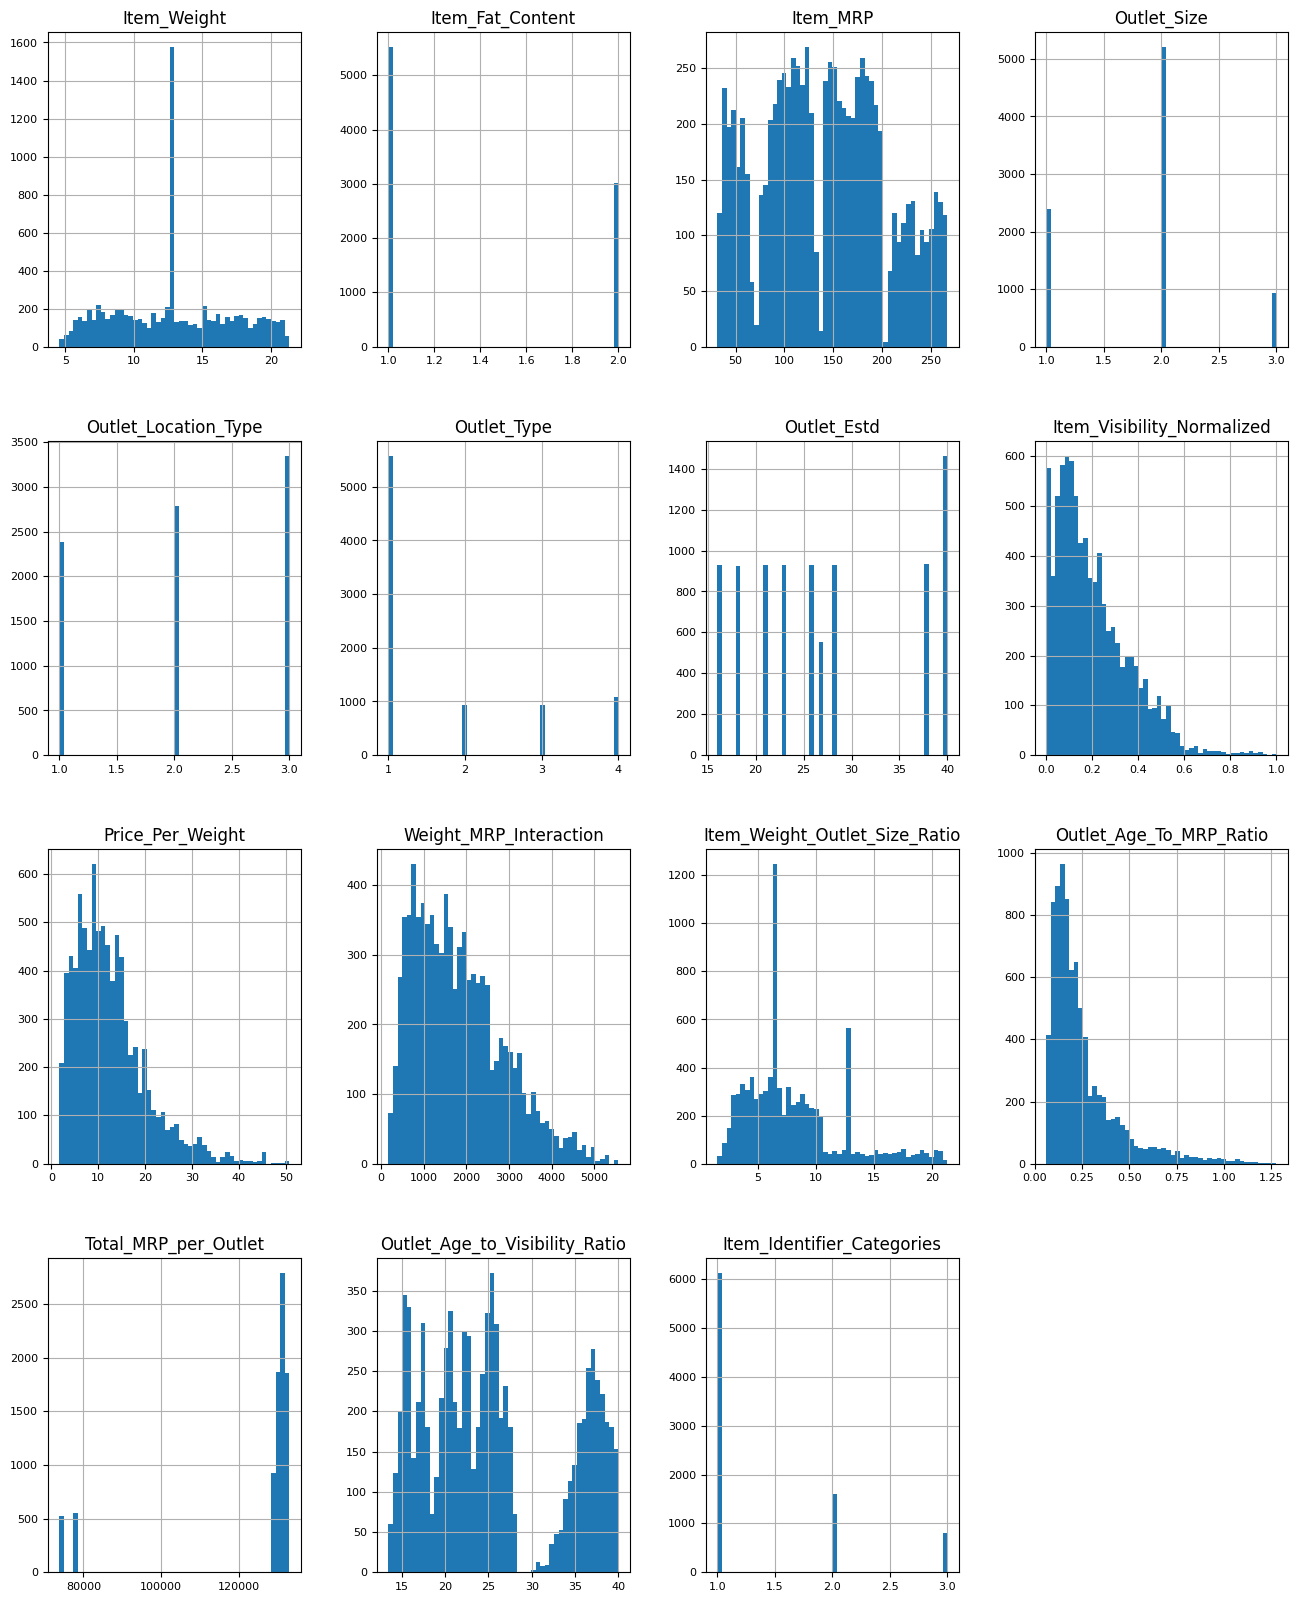

In [55]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [56]:
df_num1.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Estd,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
0,20.750000,1,107.8622,2,1,1,26,0.023374,5.198178,2238.140650,10.375000,0.241048,88326.0990,25.804791,1
1,8.300000,2,87.3198,2,2,1,18,0.118737,10.520458,724.754340,4.150000,0.206139,88457.3936,17.333899,1
2,14.600000,1,241.7538,2,3,4,27,0.307674,16.558479,3529.605480,7.300000,0.111684,52441.1972,24.554944,2
3,7.315000,1,155.0340,2,2,1,18,0.047548,21.193985,1134.073710,3.657500,0.116104,88457.3936,17.727207,1
4,12.695633,2,234.2300,2,3,3,40,0.366458,18.449651,2973.698204,6.347817,0.170772,89123.5742,35.759006,1


In [57]:
from scipy.stats import skew

data_num_skew1 = df_num.apply(lambda x: skew(x.dropna()))
data_num_skew1 = data_num_skew1[data_num_skew1 > .75]

In [58]:
data_num_skew = df_num.apply(lambda x: skew(x.dropna()))
data_num_skew = data_num_skew[data_num_skew > .75]

In [59]:
df_num = ((df_num - df_num.mean())/(df_num.max() - df_num.min()))
df_num.describe()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Estd,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
count,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03,8.523000e+03
mean,7.794878e-17,8.253400e-17,-4.228305e-17,-4.835325e-17,-9.493495e-17,-3.980807e-17,-3.939123e-17,-5.418899e-18,2.287401e-17,2.474978e-17,6.359391e-17,-4.105858e-17,-1.851805e-16,-7.690668e-17,-3.381602e-17
std,2.516562e-01,4.778361e-01,2.643272e-01,3.001637e-01,4.063787e-01,3.633282e-01,3.488234e-01,1.571232e-01,1.545545e-01,1.934545e-01,2.094906e-01,1.527625e-01,3.108099e-01,2.972176e-01,3.247856e-01
min,-4.926964e-01,-3.526927e-01,-4.656347e-01,-4.145841e-01,-5.564355e-01,-2.364973e-01,-4.653389e-01,-2.013820e-01,-2.192341e-01,-3.049813e-01,-3.254759e-01,-1.588307e-01,-8.499277e-01,-4.541077e-01,-1.875513e-01
25%,-2.095764e-01,-3.526927e-01,-2.001978e-01,-4.145841e-01,-5.564355e-01,-2.364973e-01,-2.570056e-01,-1.191950e-01,-1.132220e-01,-1.582139e-01,-1.449985e-01,-9.927849e-02,1.057686e-01,-2.292432e-01,-1.875513e-01
50%,-7.990591e-03,-3.526927e-01,8.573989e-03,8.541593e-02,-5.643553e-02,-2.364973e-01,-4.867222e-02,-3.715418e-02,-2.847300e-02,-3.407399e-02,-7.049647e-02,-4.960390e-02,1.136261e-01,-4.994235e-02,-1.875513e-01
75%,1.887565e-01,6.473073e-01,1.895213e-01,8.541593e-02,4.435645e-01,9.683601e-02,4.513278e-01,8.664448e-02,6.800232e-02,1.169489e-01,9.212223e-02,4.397329e-02,1.282347e-01,3.263010e-01,3.124487e-01
max,5.073036e-01,6.473073e-01,5.343653e-01,5.854159e-01,4.435645e-01,7.635027e-01,5.346611e-01,7.986180e-01,7.807659e-01,6.950187e-01,6.745241e-01,8.411693e-01,1.500723e-01,5.458923e-01,8.124487e-01


In [60]:
df_num1 = ((df_num1 - df_num1.mean())/(df_num1.max() - df_num1.min()))
df_num1.describe()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Estd,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
count,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03
mean,1.027166e-16,1.069379e-16,1.210868e-16,4.533916e-17,-6.128603e-17,4.377574e-17,4.064890e-17,1.172564e-17,3.408254e-17,-5.471967e-19,-3.978902e-17,3.197192e-17,-1.460233e-16,-4.033621e-17,2.626544e-17
std,2.527651e-01,4.783546e-01,2.634677e-01,3.001640e-01,4.064118e-01,3.633857e-01,3.488440e-01,1.583636e-01,1.571042e-01,1.933104e-01,2.091755e-01,1.522132e-01,3.088266e-01,2.966277e-01,3.226780e-01
min,-4.847058e-01,-3.543390e-01,-4.647656e-01,-4.145397e-01,-5.564161e-01,-2.365781e-01,-4.654624e-01,-2.029552e-01,-2.229514e-01,-3.011572e-01,-3.214471e-01,-1.612055e-01,-8.368895e-01,-4.533010e-01,-1.868509e-01
25%,-2.084331e-01,-3.543390e-01,-1.986854e-01,-4.145397e-01,-5.564161e-01,-2.365781e-01,-2.571290e-01,-1.193836e-01,-1.130911e-01,-1.573845e-01,-1.466490e-01,-9.931137e-02,8.727365e-02,-2.287840e-01,-1.868509e-01
50%,1.057670e-16,-3.543390e-01,1.671480e-03,8.546031e-02,-5.641612e-02,-2.365781e-01,-4.879569e-02,-3.562510e-02,-3.283060e-02,-3.736882e-02,-6.757762e-02,-4.890858e-02,1.114279e-01,-4.631399e-02,-1.868509e-01
75%,1.878158e-01,6.456610e-01,1.918313e-01,8.546031e-02,4.435839e-01,9.675527e-02,4.512043e-01,8.583302e-02,6.863823e-02,1.186299e-01,9.813570e-02,4.636150e-02,1.426985e-01,3.290965e-01,3.131491e-01
max,5.152942e-01,6.456610e-01,5.352344e-01,5.854603e-01,4.435839e-01,7.634219e-01,5.345376e-01,7.970448e-01,7.770486e-01,6.988428e-01,6.785529e-01,8.387945e-01,1.631105e-01,5.466990e-01,8.131491e-01


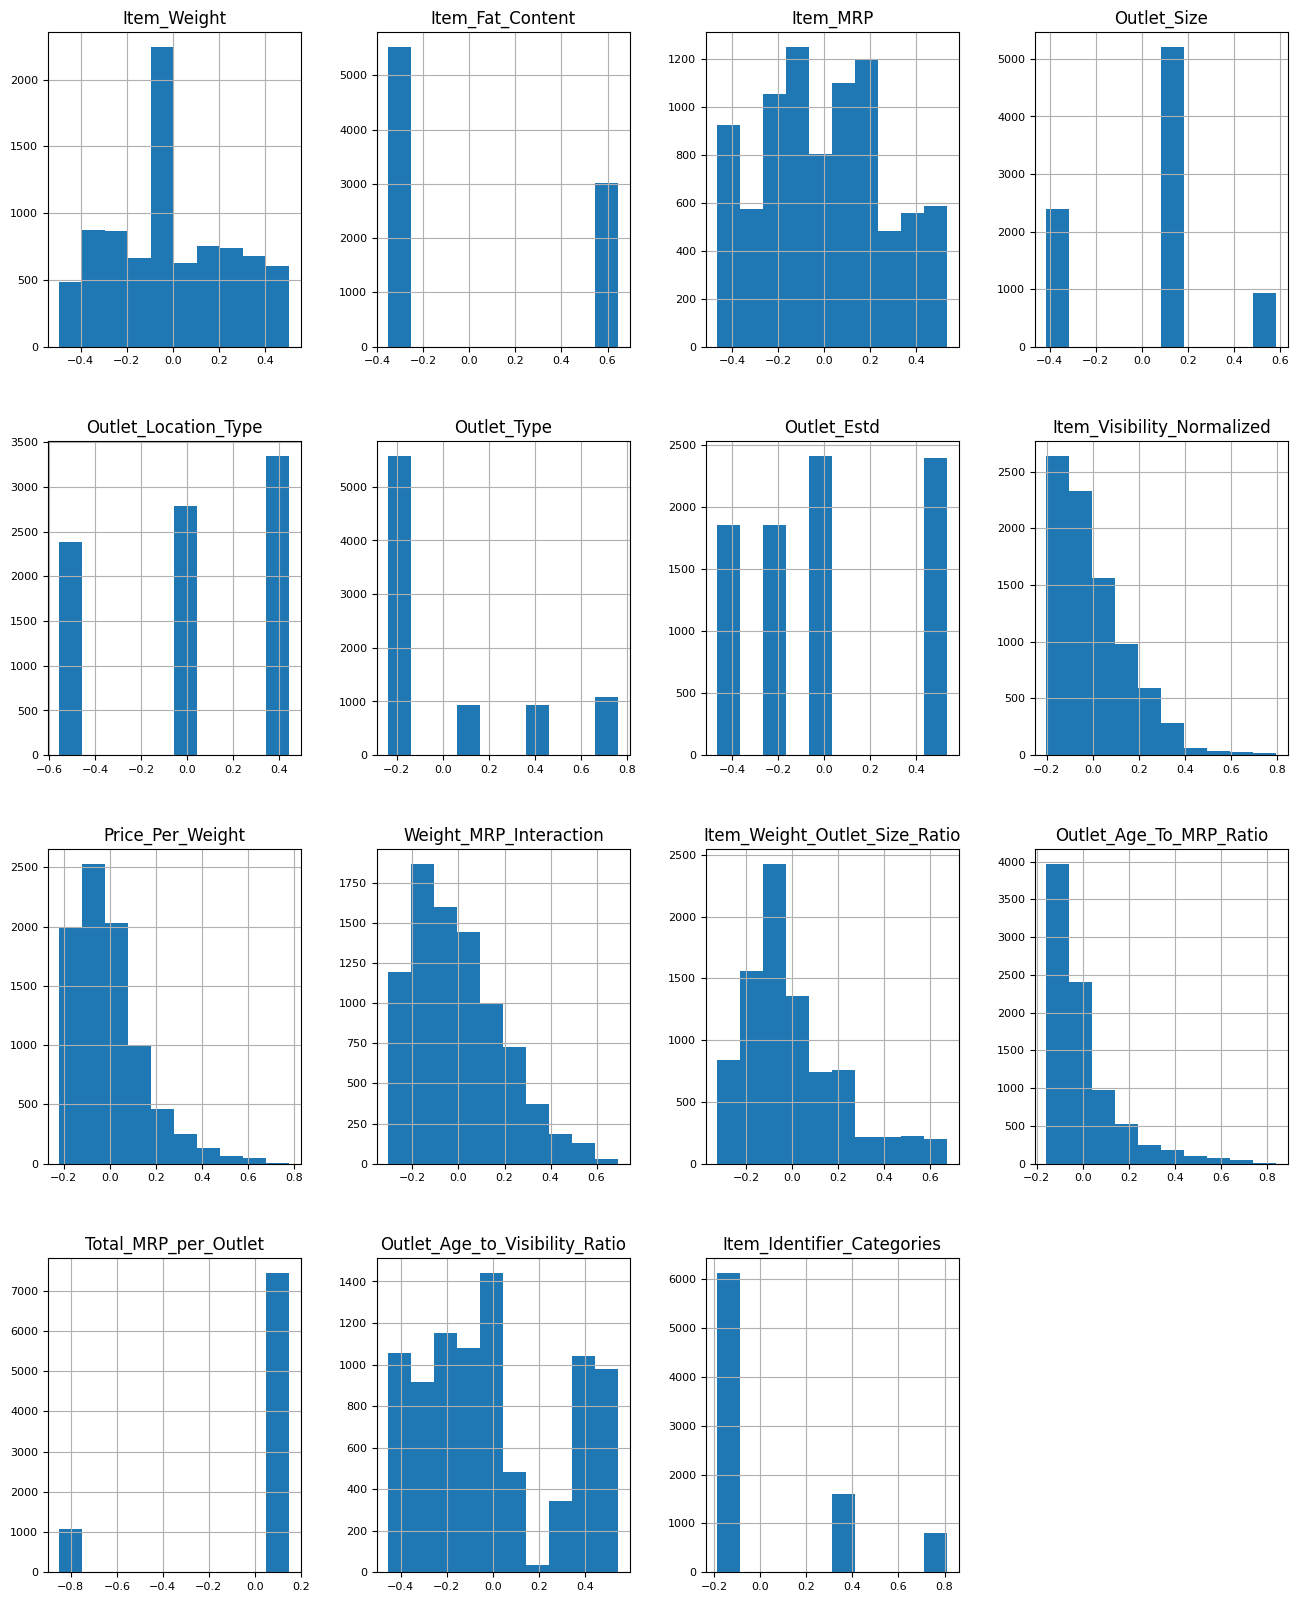

In [61]:
df_num.hist(figsize=(16, 20),xlabelsize=8, ylabelsize=8);

In [62]:
df_num.corr()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet_Estd,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
Item_Weight,1.000000,-0.021118,0.024880,0.009307,0.002749,-0.007245,-0.001786,-0.013382,-0.583687,0.593419,0.618995,-0.018208,0.002720,-0.000065,-0.016959
Item_Fat_Content,-0.021118,1.000000,0.006063,0.000622,-0.001598,-0.001967,-0.003151,0.047314,0.020417,-0.008607,-0.012389,-0.012707,0.002799,-0.010132,-0.372593
Item_MRP,0.024880,0.006063,1.000000,-0.006059,0.000232,-0.006671,-0.005020,-0.001315,0.709084,0.780825,0.020903,-0.743573,0.005321,-0.005635,-0.043510
Outlet_Size,0.009307,0.000622,-0.006059,1.000000,0.614311,-0.098807,0.193389,-0.069309,-0.001331,0.003101,-0.703440,0.085333,0.191609,0.209219,0.003656
Outlet_Location_Type,0.002749,-0.001598,0.000232,0.614311,1.000000,0.290939,0.089216,-0.028099,-0.008807,-0.000086,-0.445295,0.040237,0.060900,0.099118,-0.001300
Outlet_Type,-0.007245,-0.001967,-0.006671,-0.098807,0.290939,1.000000,0.433070,0.223308,-0.058385,-0.015031,0.012713,0.189281,-0.803894,0.394801,-0.005013
Outlet_Estd,-0.001786,-0.003151,-0.005020,0.193389,0.089216,0.433070,1.000000,0.074834,-0.066364,-0.004742,-0.036993,0.424459,-0.286787,0.986603,-0.005837
Item_Visibility_Normalized,-0.013382,0.047314,-0.001315,-0.069309,-0.028099,0.223308,0.074834,1.000000,-0.005375,-0.004349,0.040949,0.041177,-0.286679,-0.082534,-0.055652
Price_Per_Weight,-0.583687,0.020417,0.709084,-0.001331,-0.008807,-0.058385,-0.066364,-0.005375,1.000000,0.146393,-0.363049,-0.552670,0.030529,-0.065660,-0.013686
Weight_MRP_Interaction,0.593419,-0.008607,0.780825,0.003101,-0.000086,-0.015031,-0.004742,-0.004349,0.146393,1.000000,0.371199,-0.578880,0.010130,-0.004671,-0.049974


Text(0.5, 1.0, 'Correlation between features')

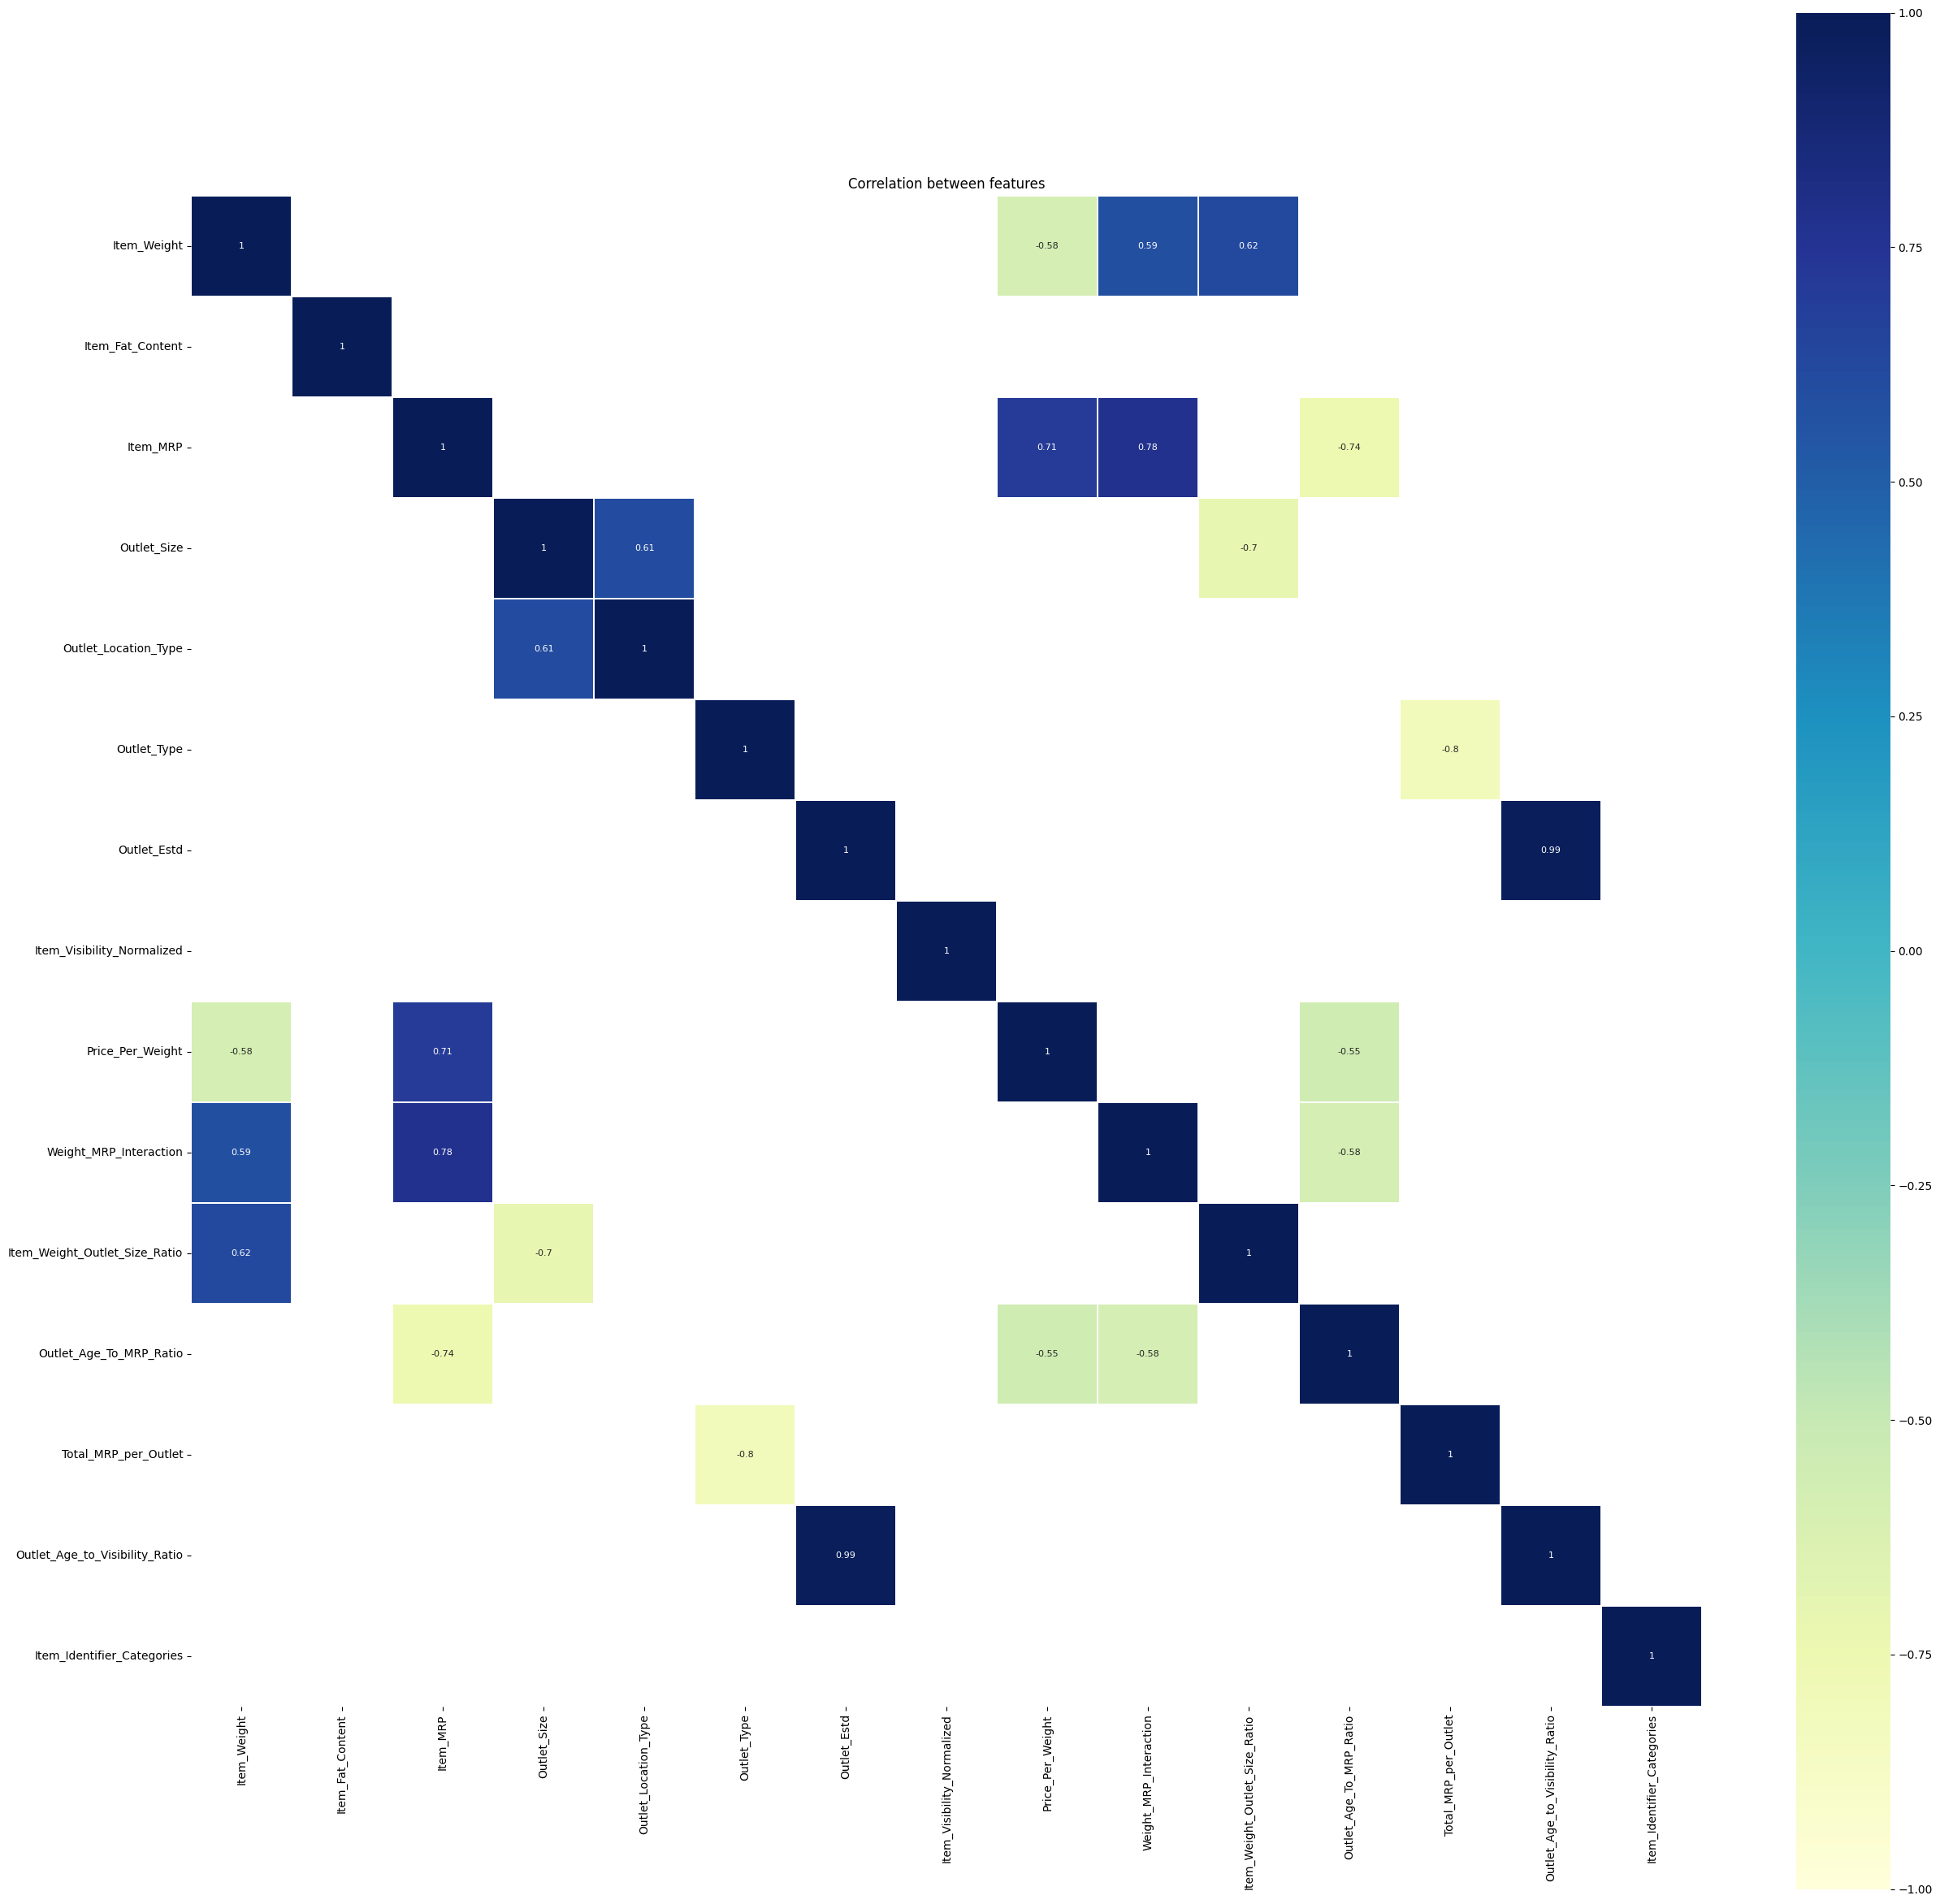

In [63]:
corr=df_num.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
cmap='YlGnBu', vmax=1.0, vmin=-1.0, linewidths=0.1,
annot=True, annot_kws={"size": 8}, square=True);
plt.title('Correlation between features')

In [64]:
df_cat.head()

,Item_Type,Item_Weight_Category
0,Dairy,Light
1,Soft Drinks,Light
2,Meat,Heavy
3,Fruits and Vegetables,Heavy
4,Household,Light


In [65]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Item_Type             8523 non-null   object  
 1   Item_Weight_Category  8523 non-null   category
dtypes: category(1), object(1)
memory usage: 75.2+ KB


In [66]:
data_en= pd.get_dummies(df_cat, columns = ['Item_Type', 'Item_Weight_Category'])
data_en_binary = data_en.apply(lambda x: (x == 1).astype(int))
data_en_binary = data_en_binary.astype(int)

In [67]:
data_en_binary.head(1)

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Weight_Category_Very Light,Item_Weight_Category_Light,Item_Weight_Category_Medium,Item_Weight_Category_Heavy,Item_Weight_Category_Very Heavy
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [68]:
data_en1= pd.get_dummies(df_cat1, columns = ['Item_Type', 'Item_Weight_Category'])
data_en1_binary = data_en1.apply(lambda x: (x == 1).astype(int))
data_en1_binary = data_en1_binary.astype(int)


In [69]:
data_en1_binary.head(1)

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Item_Weight_Category_Very Light,Item_Weight_Category_Light,Item_Weight_Category_Medium,Item_Weight_Category_Heavy,Item_Weight_Category_Very Heavy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [70]:
df_total = pd.concat([data_en_binary, df_num], axis=1)
df_total1 = pd.concat([data_en1_binary, df_num1], axis=1)

In [71]:
df_total.head(1)

,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,...,Outlet_Type,Outlet_Estd,Item_Visibility_Normalized,Price_Per_Weight,Weight_MRP_Interaction,Item_Weight_Outlet_Size_Ratio,Outlet_Age_To_MRP_Ratio,Total_MRP_per_Outlet,Outlet_Age_to_Visibility_Ratio,Item_Identifier_Categories
0,0,0,0,0,1,0,0,0,0,0,...,-0.236497,-0.048672,-0.152516,0.293606,0.094242,-0.167563,-0.122916,0.105769,0.002825,-0.187551


In [72]:
print(df_total.dtypes)

Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_Snack Foods                int64
Item_Type_Soft Drinks                int64
Item_Type_Starchy Foods              int64
Item_Weight_Category_Very Light      int64
Item_Weight_Category_Light           int64
Item_Weight_Category_Medium          int64
Item_Weight_Category_Heavy           int64
Item_Weight_Category_Very Heavy      int64
Item_Weight                        float64
Item_Fat_Content                   float64
Item_MRP   

In [73]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant



# Step 1: Add a constant column to include the intercept in the model
X = df_total.copy()
X = add_constant(X)  # Adds a constant (intercept) column to X

# Step 2: Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Step 3: Display the results
print(vif_data)



                            Feature         VIF
0                             const    0.000000
1            Item_Type_Baking Goods         inf
2                  Item_Type_Breads         inf
3               Item_Type_Breakfast         inf
4                  Item_Type_Canned         inf
5                   Item_Type_Dairy         inf
6            Item_Type_Frozen Foods         inf
7   Item_Type_Fruits and Vegetables         inf
8             Item_Type_Hard Drinks         inf
9      Item_Type_Health and Hygiene         inf
10              Item_Type_Household         inf
11                   Item_Type_Meat         inf
12                 Item_Type_Others         inf
13                Item_Type_Seafood         inf
14            Item_Type_Snack Foods         inf
15            Item_Type_Soft Drinks         inf
16          Item_Type_Starchy Foods         inf
17  Item_Weight_Category_Very Light         inf
18       Item_Weight_Category_Light         inf
19      Item_Weight_Category_Medium     

In [74]:
# Drop highly correlated features (with VIF > 5 or inf)
df_total_reduced = df_total.drop(columns=[
    'Item_Type_Breads',  # Example: Drop highly correlated features
    'Item_Type_Hard Drinks',
    'Item_Weight_Category_Very Heavy',
    'Outlet_Estd',
    'Item_MRP',
    'Item_Weight',
    'Item_Weight_Category_Light',
    'Outlet_Size',
    'Outlet_Type' # Drop perfectly collinear category
])

# Recalculate VIF
X_reduced = add_constant(df_total_reduced)
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(X_reduced.shape[1])]

# Display the reduced VIF data
print(vif_data_reduced)

                            Feature        VIF
0                             const  24.793230
1            Item_Type_Baking Goods   2.795563
2               Item_Type_Breakfast   1.332369
3                  Item_Type_Canned   2.790773
4                   Item_Type_Dairy   2.478775
5            Item_Type_Frozen Foods   3.306151
6   Item_Type_Fruits and Vegetables   4.154673
7      Item_Type_Health and Hygiene   2.029453
8               Item_Type_Household   2.712965
9                    Item_Type_Meat   2.221181
10                 Item_Type_Others   1.351946
11                Item_Type_Seafood   1.191939
12            Item_Type_Snack Foods   4.087335
13            Item_Type_Soft Drinks   2.410219
14          Item_Type_Starchy Foods   1.440238
15  Item_Weight_Category_Very Light   1.065377
16      Item_Weight_Category_Medium   1.815515
17       Item_Weight_Category_Heavy   2.249867
18                 Item_Fat_Content   1.237591
19             Outlet_Location_Type   1.429016
20       Item

In [75]:
final_features = [
    'Item_Type_Baking Goods', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
    'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Health and Hygiene',
    'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood',
    'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
    'Item_Weight_Category_Very Light', 'Item_Weight_Category_Medium', 'Item_Weight_Category_Heavy',
    'Item_Fat_Content', 'Outlet_Location_Type', 'Item_Visibility_Normalized', 'Price_Per_Weight',
    'Weight_MRP_Interaction', 'Item_Weight_Outlet_Size_Ratio', 'Outlet_Age_To_MRP_Ratio',
    'Total_MRP_per_Outlet', 'Outlet_Age_to_Visibility_Ratio', 'Item_Identifier_Categories'
]


In [76]:
df_test.shape,df_total1.shape

((5681, 17), (5681, 36))

In [77]:
y1 = target

In [78]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

# Remove features with high VIF
X_reduced = df_total[final_features]
# Step 3: Apply RFE for further feature selection
rfe = RFE(estimator=DecisionTreeRegressor(random_state=0), n_features_to_select=9)
rfe = rfe.fit(X_reduced, y1)

# Get the selected features from RFE
selected_features = X_reduced.columns[rfe.support_]
print("Selected Features after RFE:", selected_features)
selected_features = selected_features[selected_features != 'const']

Selected Features after RFE: Index(['Item_Type_Fruits and Vegetables', 'Item_Fat_Content',
       'Item_Visibility_Normalized', 'Price_Per_Weight',
       'Weight_MRP_Interaction', 'Item_Weight_Outlet_Size_Ratio',
       'Outlet_Age_To_MRP_Ratio', 'Total_MRP_per_Outlet',
       'Outlet_Age_to_Visibility_Ratio'],
      dtype='object')


In [79]:
#Modelling
X_train = df_total[selected_features]
y_train = target
X_test = df_total1[selected_features]
X_train.shape,y_train.shape,X_test.shape

((8523, 9), (8523,), (5681, 9))

In [80]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
rf_reg_pred = rf_reg.predict(X_test)

In [81]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor(n_estimators=100, random_state=42)
lgb_reg_predictions = lgb_reg.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 9
[LightGBM] [Info] Start training from score 2181.288915


In [82]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_reg_predictions = xgb_reg.fit(X_train, y_train)
xgb_reg_predictions

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [83]:
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
svr_reg_pred = svr_reg.predict(X_test)
svr_reg_pred

array([1865.93382253, 1674.53457158, 1374.42058923, ..., 1774.14178921,
       1911.14734074, 1653.01190588])

In [84]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg_pred = dt_reg.fit(X_train, y_train)
dt_reg_pred

DecisionTreeRegressor(random_state=42)

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg_pred = gb_reg.fit(X_train, y_train)
gb_reg_pred

GradientBoostingRegressor(random_state=42)

In [86]:
# Import necessary models
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
import lightgbm as lgb

# Define the individual models
estimators_reg = [
    ('rf', RandomForestRegressor(random_state=42)),
    ('xgb', xgb.XGBRegressor(random_state=42)),
    ('lgb', lgb.LGBMRegressor(random_state=42)),
    ('svr', SVR(kernel='rbf')),
    ('dt', DecisionTreeRegressor(random_state=42)),
]

# Create and fit the VotingRegressor
VotingRegressor_model = VotingRegressor(estimators=estimators_reg)
VotingRegressor_model.fit(X_train, y_train)

# Predict using the VotingRegressor
VotingRegressor_pred = VotingRegressor_model.predict(X_test)

# To get the predictions from individual models:
predictions = {}

# Iterate over each individual estimator and make predictions
for name, model in estimators_reg:
    model.fit(X_train, y_train)  # Fit the model
    predictions[name] = model.predict(X_test)  # Store predictions in a dictionary

# Now you can see the predictions for each model
for model_name, model_pred in predictions.items():
    print(f"Predictions from {model_name}:\n", model_pred)

# Also print VotingRegressor's final predictions
print("\nVoting Regressor Predictions:\n", VotingRegressor_pred)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 9
[LightGBM] [Info] Start training from score 2181.288915
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1545
[LightGBM] [Info] Number of data points in the train set: 8523, number of used features: 9
[LightGBM] [Info] Start training from score 2181.288915
Predictions from rf:
 [1535.20164  1440.611434  698.370936 ... 1648.274454 4103.638326
 1544.043464]
Predictions from xgb:
 [1410.688   1617.5927   404.12

In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=42)

# Define a more reduced parameter grid
rf_param_grid = {
    'n_estimators': [100],  # Only one option for n_estimators
    'max_depth': [None],  # Only one option for max_depth
    'min_samples_split': [2],  # Only one option for min_samples_split
    'min_samples_leaf': [1]  # Only one option for min_samples_leaf
}

# Perform GridSearchCV with a smaller parameter grid
grid_search_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=2,  # Reduced cross-validation folds for faster execution
    scoring='neg_mean_absolute_error',
    n_jobs=-1,  # Use all available CPU cores
    verbose=2
)

# Fit the grid search
grid_search_rf.fit(X_train, y_train)

# Access the best RandomForest model
rf_best = grid_search_rf.best_estimator_

# Print the best parameters
print("Best parameters for RandomForest:", grid_search_rf.best_params_)


Fitting 2 folds for each of 1 candidates, totalling 2 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [96]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

# Define a reduced parameter grid for GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced number of estimators
    'learning_rate': [0.01, 0.05, 0.1],  # Reduced learning rates
    'max_depth': [3, 5, 7],  # Fewer depths
    'subsample': [0.7, 0.8]  # Reduced subsample values
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42)

# GridSearchCV with 2-fold cross-validation and parallel processing
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=2,  # 2-fold cross-validation for faster execution
    n_jobs=-1,  # Use all available CPUs for parallel processing
    verbose=2,  # Print progress
    scoring='neg_mean_absolute_error',  # Use negative mean absolute error as the scoring metric
)

# Fit the grid search to the training data (X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the total number of fits
total_fits = len(xgb_param_grid['n_estimators']) * len(xgb_param_grid['learning_rate']) * len(xgb_param_grid['max_depth']) * len(xgb_param_grid['subsample']) * 2  # n_iter times cv (2 folds in this case)
print(f"Total fits: {total_fits}")
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint

# Define a reduced parameter grid for GridSearchCV
xgb_param_grid = {
    'n_estimators': [100, 200, 300],  # Reduced number of estimators
    'learning_rate': [0.01, 0.05, 0.1],  # Reduced learning rates
    'max_depth': [3, 5, 7],  # Fewer depths
    'subsample': [0.7, 0.8]  # Reduced subsample values
}

# Initialize XGBRegressor
xgb_model = xgb.XGBRegressor(random_state=42)

# GridSearchCV with 2-fold cross-validation and parallel processing
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=2,  # 2-fold cross-validation for faster execution
    n_jobs=-1,  # Use all available CPUs for parallel processing
    verbose=2,  # Print progress
    scoring='neg_mean_absolute_error',  # Use negative mean absolute error as the scoring metric
)

# Fit the grid search to the training data (X_train, y_train)
grid_search_xgb.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Get the total number of fits
total_fits = len(xgb_param_grid['n_estimators']) * len(xgb_param_grid['learning_rate']) * len(xgb_param_grid['max_depth']) * len(xgb_param_grid['subsample']) * 2  # n_iter times cv (2 folds in this case)
print(f"Total fits: {total_fits}")


Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Total fits: 108
Fitting 2 folds for each of 54 candidates, totalling 108 fits
Best parameters for XGBoost: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Total fits: 108


In [97]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a smaller parameter grid to speed up the process
svr_param_grid = {
    'C': np.arange(1, 51, 10),  # Reduced range for C (1 to 50 with step 10)
    'epsilon': np.arange(0.1, 0.3, 0.05),  # Reduced range for epsilon (0.1 to 0.3 with step 0.05)
    'kernel': ['linear', 'rbf']  # Keep kernel choice between 'linear' and 'rbf'
}

# Initialize SVR
svr_model = SVR()

# GridSearchCV with 2-fold cross-validation and parallel processing
grid_search_svr = GridSearchCV(
    estimator=svr_model,
    param_grid=svr_param_grid,
    cv=2,  # Keep 2-fold cross-validation for reasonable speed and validation
    n_jobs=-1,  # Use all available CPUs for parallel processing
    verbose=1,  # Reduce verbosity to avoid too much output
    scoring='neg_mean_absolute_error',  # Use negative mean absolute error as the scoring metric
    refit=True,  # Refit the best model after grid search is done
)

# Fit the grid search to the training data (X_train, y_train)
grid_search_svr.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best parameters for SVR:", grid_search_svr.best_params_)

# Get the total number of fits
total_fits = len(svr_param_grid['C']) * len(svr_param_grid['epsilon']) * len(svr_param_grid['kernel']) * 2  # cv=2 (2 folds)
print(f"Total fits: {total_fits}")


Fitting 2 folds for each of 40 candidates, totalling 80 fits
Best parameters for SVR: {'C': np.int64(41), 'epsilon': np.float64(0.25000000000000006), 'kernel': 'rbf'}
Total fits: 80


In [98]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

# Define a smaller parameter grid for faster execution
dt_param_grid = {
    'max_depth': [None, 10, 20],  # Reduced values for max_depth
    'min_samples_split': [2, 5, 7],  # Reduced values for min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Reduced values for min_samples_leaf
}

# Initialize DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

# GridSearchCV with 2-fold cross-validation and parallel processing
grid_search_dt = GridSearchCV(
    estimator=dt_model,
    param_grid=dt_param_grid,
    cv=2,  # Keep 2-fold cross-validation for reasonable speed and validation
    n_jobs=-1,  # Use all available CPUs for parallel processing
    verbose=1,  # Reduce verbosity for cleaner output
    scoring='neg_mean_absolute_error',  # Use negative mean absolute error as the scoring metric
)

# Fit the grid search to the training data (X_train, y_train)
grid_search_dt.fit(X_train, y_train)

# Best hyperparameters found by GridSearchCV
print("Best parameters for DecisionTree:", grid_search_dt.best_params_)

# Get the total number of fits
total_fits = len(dt_param_grid['max_depth']) * len(dt_param_grid['min_samples_split']) * len(dt_param_grid['min_samples_leaf']) * 2  # cv=2 (2 folds)
print(f"Total fits: {total_fits}")


Fitting 2 folds for each of 27 candidates, totalling 54 fits
Best parameters for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 7}
Total fits: 54


In [105]:
from sklearn.ensemble import VotingRegressor

# Assuming you have already done GridSearchCV for each model and have the best models:
rf_best = grid_search_rf.best_estimator_  # Best model from GridSearchCV for RandomForest
xgb_best = grid_search_xgb.best_estimator_  # Best model from GridSearchCV for XGBoost
svr_best = grid_search_svr.best_estimator_  # Best model from GridSearchCV for SVR
dt_best = grid_search_dt.best_estimator_  # Best model from GridSearchCV for DecisionTree

# Create the VotingRegressor with the tuned models
tuned_estimators = [
    ('rf', rf_best),  # Best RandomForest model
    ('xgb', xgb_best),  # Best XGBoost model
    ('svr', svr_best),  # Best SVR model
    ('dt', dt_best)  # Best DecisionTree model
]

# Rebuild the VotingRegressor model with the tuned estimators
voting_regressor_tuned1 = VotingRegressor(estimators=tuned_estimators)

# Fit the VotingRegressor model on the training data (X_train, y_train)
voting_regressor_tuned1.fit(X_train, y_train)

# Make predictions using the tuned VotingRegressor model on the test data (X_test)
voting_regressor_pred_tuned1 = voting_regressor_tuned1.predict(X_test)

# Print the predictions
print(voting_regressor_pred_tuned1)


[1492.19029365 1388.71872771  610.73608443 ... 1850.9987028  3815.55147308
 1302.40394652]


In [100]:
#Saving the Output
# Convert individual model predictions to a DataFrame
predictions_df = pd.DataFrame(voting_regressor_pred_tuned1)

# Add the VotingRegressor's predictions to the DataFrame
predictions_df['voting_regressor_pred_tuned1'] = voting_regressor_pred_tuned1


In [102]:
# Step 1: Create a DataFrame from the predictions with 'Item_Outlet_Sales' as the only column
y_test = pd.DataFrame(voting_regressor_pred_tuned1, columns=['Item_Outlet_Sales'])

# Step 2: Add 'Item_Identifier' and 'Outlet_Identifier' columns from df_test
df_test_subset = df_test_copy.iloc[:len(VotingRegressor_pred), :]  # Ensure the length matches

y_test['Item_Identifier'] = df_test_subset['Item_Identifier'].values
y_test['Outlet_Identifier'] = df_test_subset['Outlet_Identifier'].values

# Step 3: Reorder the columns as per the required format (Item_Identifier, Outlet_Identifier, Item_Outlet_Sales)
y_test = y_test[['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales']]

# Step 4: Save the result as a CSV file for submission
y_test.to_csv('prediction.csv', index=False)

# Print the first few rows of the final submission DataFrame
print(y_test.head())

  Item_Identifier Outlet_Identifier  Item_Outlet_Sales
0           FDW58            OUT049        1492.190294
1           FDW14            OUT017        1388.718728
2           NCN55            OUT010         610.736084
3           FDQ58            OUT017        2085.939679
4           FDY38            OUT027        4675.295292


In [103]:
from google.colab import files

# Download the saved file
files.download('prediction.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>